In [48]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [49]:
matplotlib.rcParams['figure.figsize'] = [20, 10]
matplotlib.rcParams['font.size'] = 20

In [50]:
## bajando el dataset
cars_df = pd.read_csv("data/monthly-car-sales-in-quebec-1960.csv")
cars_df.tail()

,Month,Monthly car sales in Quebec 1960-1968
103,1968-08,16722
104,1968-09,14385
105,1968-10,21342
106,1968-11,17180
107,1968-12,14577


In [51]:
cars_df["dt"] = cars_df["Month"].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m'))

In [52]:
cars_df = cars_df\
    .rename({"Monthly car sales in Quebec 1960-1968": "sales"}, axis=1)\
    .drop("Month", axis=1)
cars_df.tail()

,sales,dt
103,16722,1968-08-01
104,14385,1968-09-01
105,21342,1968-10-01
106,17180,1968-11-01
107,14577,1968-12-01


In [53]:
cars_df[['dt']].groupby(cars_df["dt"].dt.year).count()

,dt
dt,
1960,12
1961,12
1962,12
1963,12
1964,12
1965,12
1966,12
1967,12
1968,12


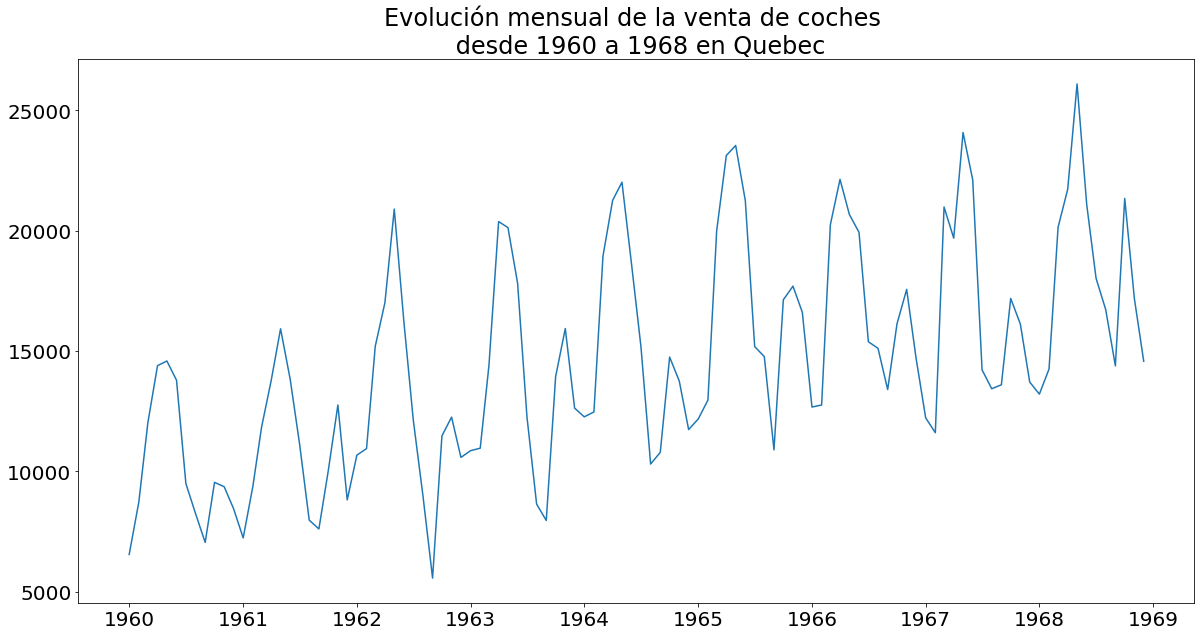

In [54]:
plt.plot(cars_df["dt"], cars_df["sales"])
plt.title("Evolución mensual de la venta de coches \n desde 1960 a 1968 en Quebec")
plt.show()

In [55]:
N_lags = 12
Xy = cars_df[['dt', 'sales']]

def create_lags(Xy, n_lags):
    Xy_with_lags = Xy.sort_values('dt').copy()
    for i in range(1, n_lags+1):
        Xy_with_lags['sales-'+str(i)] = Xy_with_lags['sales'].shift(i)
    return Xy_with_lags

Xy_with_lags = create_lags(Xy, N_lags).iloc[N_lags:]
Xy_with_lags.head()

,dt,sales,sales-1,sales-2,sales-3,sales-4,sales-5,sales-6,sales-7,sales-8,sales-9,sales-10,sales-11,sales-12
12,1961-01-01,7237,8456.0,9364.0,9545.0,7049.0,8251.0,9498.0,13791.0,14587.0,14395.0,12026.0,8728.0,6550.0
13,1961-02-01,9374,7237.0,8456.0,9364.0,9545.0,7049.0,8251.0,9498.0,13791.0,14587.0,14395.0,12026.0,8728.0
14,1961-03-01,11837,9374.0,7237.0,8456.0,9364.0,9545.0,7049.0,8251.0,9498.0,13791.0,14587.0,14395.0,12026.0
15,1961-04-01,13784,11837.0,9374.0,7237.0,8456.0,9364.0,9545.0,7049.0,8251.0,9498.0,13791.0,14587.0,14395.0
16,1961-05-01,15926,13784.0,11837.0,9374.0,7237.0,8456.0,9364.0,9545.0,7049.0,8251.0,9498.0,13791.0,14587.0


In [56]:
Xy_with_lags["diff12"] = Xy_with_lags["sales"] - Xy_with_lags["sales-12"]

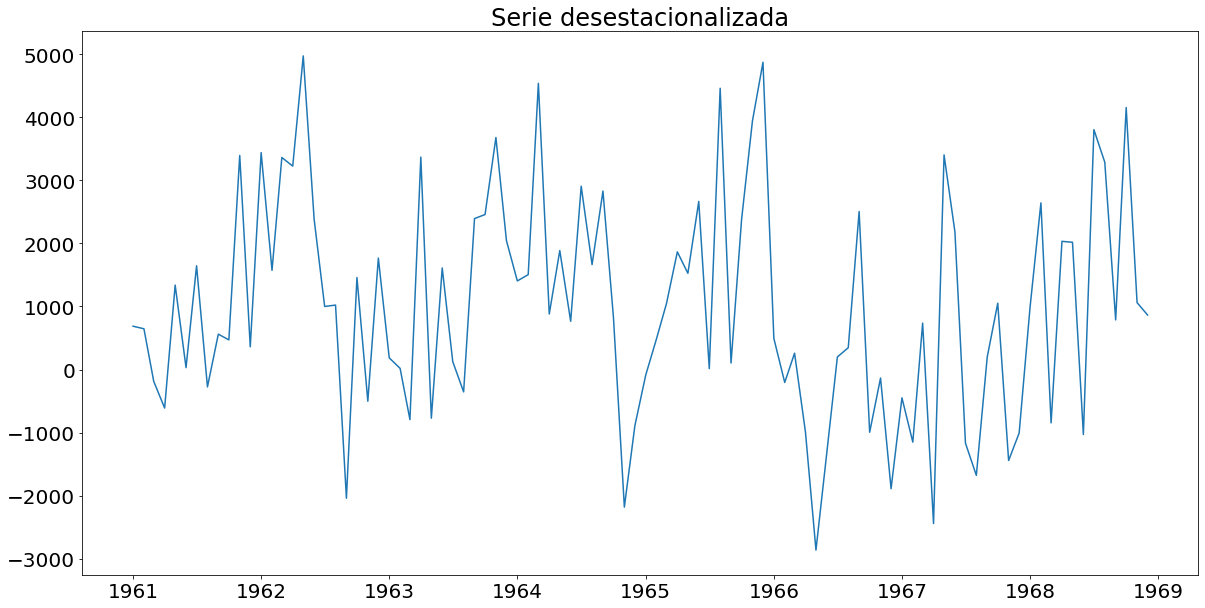

In [57]:
plt.plot(Xy_with_lags["dt"], Xy_with_lags["diff12"])
plt.title("Serie desestacionalizada")
plt.show()

In [58]:
Xy_with_lags['mean'] = Xy_with_lags.drop(['dt','sales-12', 'diff12'], axis=1).mean(axis=1)

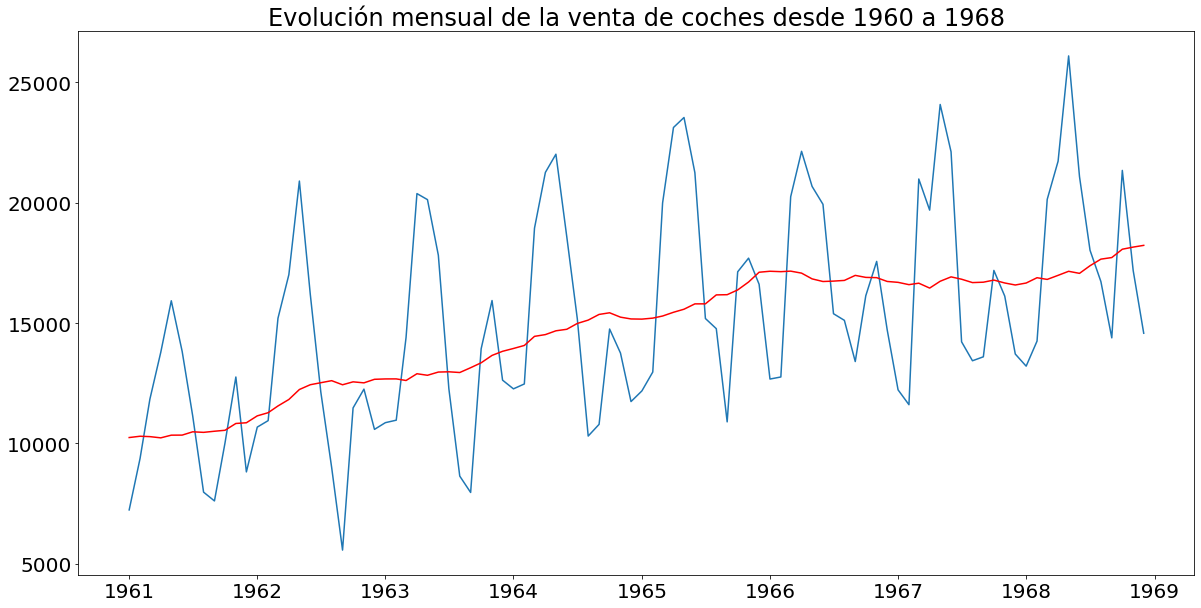

In [59]:
plt.plot(Xy_with_lags["dt"], Xy_with_lags["sales"])
plt.plot(Xy_with_lags["dt"], Xy_with_lags["mean"],color="red")
plt.title("Evolución mensual de la venta de coches desde 1960 a 1968")
plt.show()

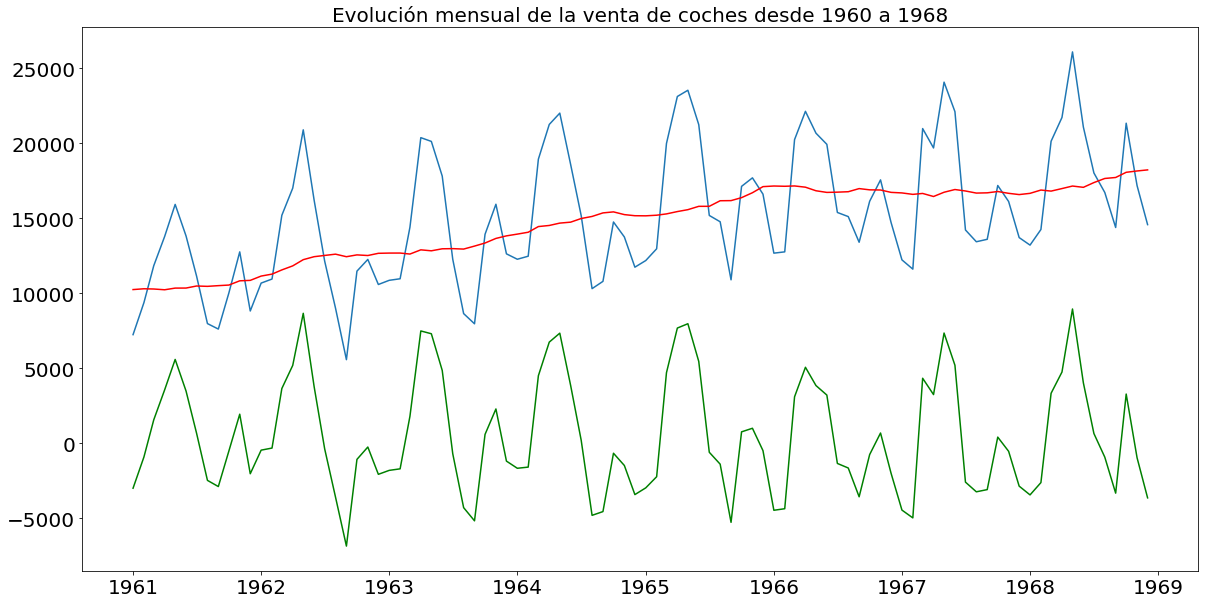

In [60]:
plt.plot(Xy_with_lags["dt"], Xy_with_lags["sales"])
plt.plot(Xy_with_lags["dt"], Xy_with_lags["mean"],color="red")
plt.plot(Xy_with_lags["dt"], Xy_with_lags["sales"]-Xy_with_lags["mean"],color="green")
plt.title("Evolución mensual de la venta de coches desde 1960 a 1968",size=20)
plt.show()

In [64]:
Xy_with_lags['seasonal'] = Xy_with_lags["sales"] - Xy_with_lags["mean"]
Xy_with_lags['month'] = Xy_with_lags["dt"].dt.month
Xy_seasons = Xy_with_lags[['month', 'seasonal']].copy()
#Xy_seasons_m12 = Xy_with_lags[['month', 'seasonal']].copy()
#Xy_seasons_m12["month"] = Xy_seasons_m12["month"] - 12
#Xy_seasons_12 = Xy_with_lags[['month', 'seasonal']].copy()
#Xy_seasons_12["month"] = Xy_seasons_12["month"] + 12
#Xy_seasons = pd.concat([Xy_seasons, Xy_seasons_m12, Xy_seasons_12])\
#    .query("month ")

In [65]:
max_degree = 10
for i in range(2, max_degree + 1):
    Xy_seasons['month'+str(i)] =  Xy_seasons['month']**i

In [66]:
Xy_seasons

,month,seasonal,month2,month3,month4,month5,month6,month7,month8,month9,month10
12,1,-3006.916667,1,1,1,1,1,1,1,1,1
13,2,-923.750000,4,8,16,32,64,128,256,512,1024
14,3,1555.000000,9,27,81,243,729,2187,6561,19683,59049
15,4,3552.916667,16,64,256,1024,4096,16384,65536,262144,1048576
16,5,5583.333333,25,125,625,3125,15625,78125,390625,1953125,9765625
...,...,...,...,...,...,...,...,...,...,...,...
103,8,-933.916667,64,512,4096,32768,262144,2097152,16777216,134217728,1073741824
104,9,-3336.500000,81,729,6561,59049,531441,4782969,43046721,387420489,3486784401
105,10,3274.250000,100,1000,10000,100000,1000000,10000000,100000000,1000000000,10000000000
106,11,-976.166667,121,1331,14641,161051,1771561,19487171,214358881,2357947691,25937424601


In [67]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(Xy_seasons.drop(['seasonal'],axis=1),Xy_seasons['seasonal'])
seasonal_hat = reg.predict([[month**i for i in range(1, max_degree+1)] 
                 for month in range(1, 13)])
seasonal_hat_df = pd.DataFrame({
        'month': range(1, 13),
        'seasonal_hat': seasonal_hat
    })

In [69]:
seasonal_hat

array([-2814.73288952, -2372.36318208,  3379.50398926,  5372.54570163,
        7272.49606407,  4004.03633204,  -300.48187902, -2959.48763159,
       -4265.948468  ,   230.91661951,   348.56585047, -2196.54011801])

In [70]:
seasonal_hat_df

,month,seasonal_hat
0,1,-2814.732890
1,2,-2372.363182
2,3,3379.503989
3,4,5372.545702
4,5,7272.496064
5,6,4004.036332
6,7,-300.481879
7,8,-2959.487632
8,9,-4265.948468
9,10,230.916620


In [71]:
Xy_with_lags_total = Xy_with_lags.merge(seasonal_hat_df).sort_values('dt')

In [72]:
Xy_with_lags_total

,dt,sales,sales-1,sales-2,sales-3,sales-4,sales-5,sales-6,sales-7,sales-8,sales-9,sales-10,sales-11,sales-12,diff12,mean,seasonal,month,seasonal_hat
0,1961-01-01,7237,8456.0,9364.0,9545.0,7049.0,8251.0,9498.0,13791.0,14587.0,14395.0,12026.0,8728.0,6550.0,687.0,10243.916667,-3006.916667,1,-2814.732890
8,1961-02-01,9374,7237.0,8456.0,9364.0,9545.0,7049.0,8251.0,9498.0,13791.0,14587.0,14395.0,12026.0,8728.0,646.0,10297.750000,-923.750000,2,-2372.363182
16,1961-03-01,11837,9374.0,7237.0,8456.0,9364.0,9545.0,7049.0,8251.0,9498.0,13791.0,14587.0,14395.0,12026.0,-189.0,10282.000000,1555.000000,3,3379.503989
24,1961-04-01,13784,11837.0,9374.0,7237.0,8456.0,9364.0,9545.0,7049.0,8251.0,9498.0,13791.0,14587.0,14395.0,-611.0,10231.083333,3552.916667,4,5372.545702
32,1961-05-01,15926,13784.0,11837.0,9374.0,7237.0,8456.0,9364.0,9545.0,7049.0,8251.0,9498.0,13791.0,14587.0,1339.0,10342.666667,5583.333333,5,7272.496064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,1968-08-01,16722,18024.0,21084.0,26099.0,21725.0,20139.0,14251.0,13210.0,13713.0,16119.0,17187.0,13598.0,13434.0,3288.0,17655.916667,-933.916667,8,-2959.487632
71,1968-09-01,14385,16722.0,18024.0,21084.0,26099.0,21725.0,20139.0,14251.0,13210.0,13713.0,16119.0,17187.0,13598.0,787.0,17721.500000,-3336.500000,9,-4265.948468
79,1968-10-01,21342,14385.0,16722.0,18024.0,21084.0,26099.0,21725.0,20139.0,14251.0,13210.0,13713.0,16119.0,17187.0,4155.0,18067.750000,3274.250000,10,230.916620
87,1968-11-01,17180,21342.0,14385.0,16722.0,18024.0,21084.0,26099.0,21725.0,20139.0,14251.0,13210.0,13713.0,16119.0,1061.0,18156.166667,-976.166667,11,348.565850


In [73]:
Xy_with_lags_total['residual'] = Xy_with_lags_total['seasonal']-Xy_with_lags_total['seasonal_hat']

In [74]:
Xy_with_lags_total

,dt,sales,sales-1,sales-2,sales-3,sales-4,sales-5,sales-6,sales-7,sales-8,sales-9,sales-10,sales-11,sales-12,diff12,mean,seasonal,month,seasonal_hat,residual
0,1961-01-01,7237,8456.0,9364.0,9545.0,7049.0,8251.0,9498.0,13791.0,14587.0,14395.0,12026.0,8728.0,6550.0,687.0,10243.916667,-3006.916667,1,-2814.732890,-192.183777
8,1961-02-01,9374,7237.0,8456.0,9364.0,9545.0,7049.0,8251.0,9498.0,13791.0,14587.0,14395.0,12026.0,8728.0,646.0,10297.750000,-923.750000,2,-2372.363182,1448.613182
16,1961-03-01,11837,9374.0,7237.0,8456.0,9364.0,9545.0,7049.0,8251.0,9498.0,13791.0,14587.0,14395.0,12026.0,-189.0,10282.000000,1555.000000,3,3379.503989,-1824.503989
24,1961-04-01,13784,11837.0,9374.0,7237.0,8456.0,9364.0,9545.0,7049.0,8251.0,9498.0,13791.0,14587.0,14395.0,-611.0,10231.083333,3552.916667,4,5372.545702,-1819.629035
32,1961-05-01,15926,13784.0,11837.0,9374.0,7237.0,8456.0,9364.0,9545.0,7049.0,8251.0,9498.0,13791.0,14587.0,1339.0,10342.666667,5583.333333,5,7272.496064,-1689.162731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,1968-08-01,16722,18024.0,21084.0,26099.0,21725.0,20139.0,14251.0,13210.0,13713.0,16119.0,17187.0,13598.0,13434.0,3288.0,17655.916667,-933.916667,8,-2959.487632,2025.570965
71,1968-09-01,14385,16722.0,18024.0,21084.0,26099.0,21725.0,20139.0,14251.0,13210.0,13713.0,16119.0,17187.0,13598.0,787.0,17721.500000,-3336.500000,9,-4265.948468,929.448468
79,1968-10-01,21342,14385.0,16722.0,18024.0,21084.0,26099.0,21725.0,20139.0,14251.0,13210.0,13713.0,16119.0,17187.0,4155.0,18067.750000,3274.250000,10,230.916620,3043.333380
87,1968-11-01,17180,21342.0,14385.0,16722.0,18024.0,21084.0,26099.0,21725.0,20139.0,14251.0,13210.0,13713.0,16119.0,1061.0,18156.166667,-976.166667,11,348.565850,-1324.732517


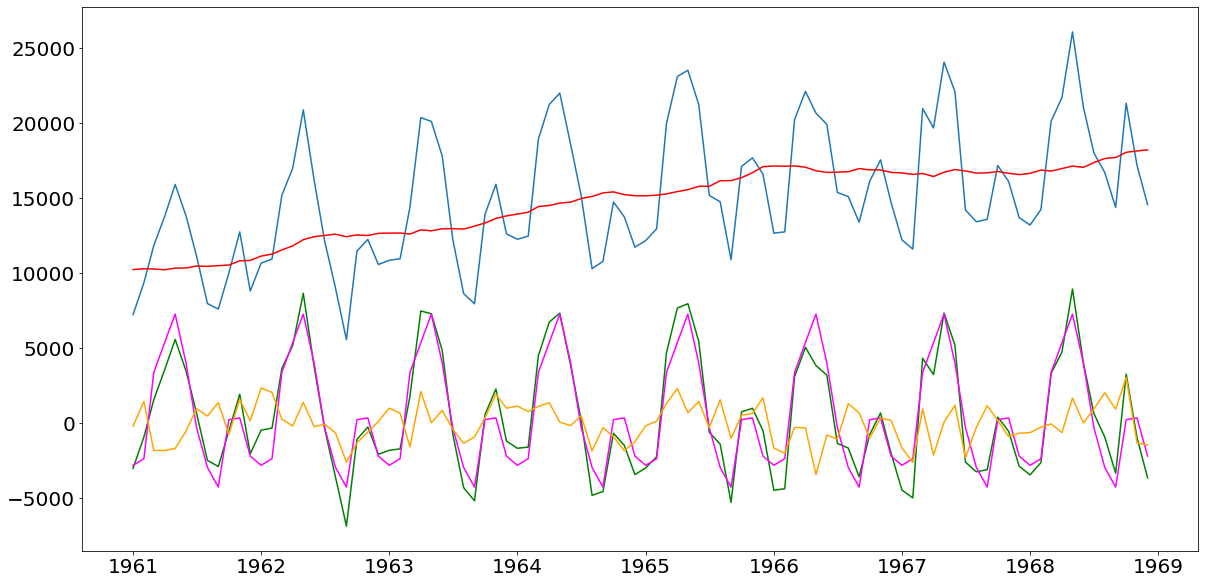

In [75]:
plt.plot(Xy_with_lags_total["dt"], Xy_with_lags_total["sales"])
plt.plot(Xy_with_lags_total["dt"], Xy_with_lags_total["mean"],color="red")
plt.plot(Xy_with_lags_total["dt"], Xy_with_lags_total["seasonal"],color="green")
plt.plot(Xy_with_lags_total["dt"], Xy_with_lags_total["seasonal_hat"],color="magenta")

plt.plot(Xy_with_lags_total["dt"], Xy_with_lags_total["residual"],color="orange")
plt.show()

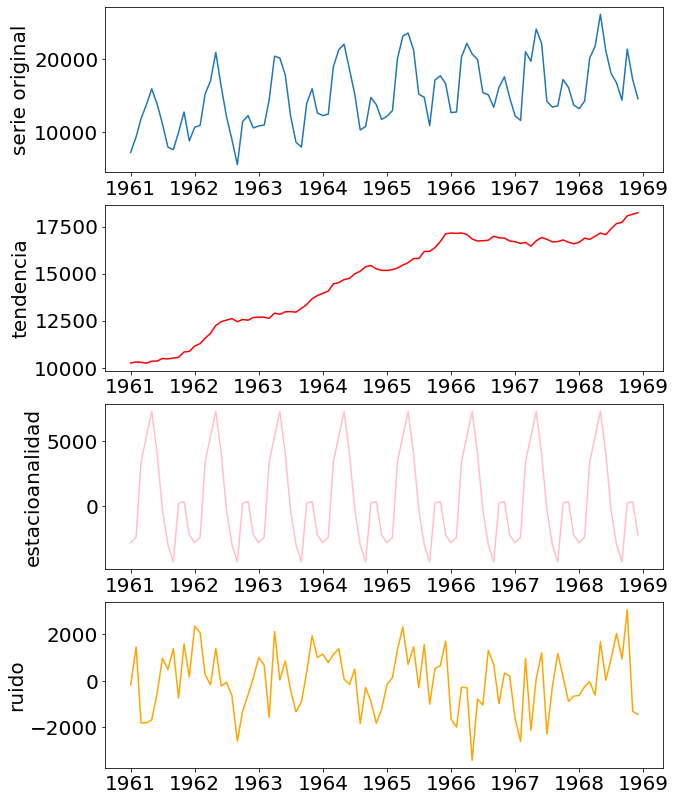

In [76]:
fig,ax = plt.subplots(nrows=4, ncols=1,figsize=(10,14))
ax[0].plot(Xy_with_lags_total["dt"], Xy_with_lags_total["sales"])
ax[0].set_ylabel("serie original",size=20)
ax[1].plot(Xy_with_lags_total["dt"], Xy_with_lags_total["mean"],color="red")
ax[1].set_ylabel("tendencia",size=20)
ax[2].plot(Xy_with_lags_total["dt"], Xy_with_lags_total["seasonal_hat"],color='pink')
ax[2].set_ylabel("estacioanalidad",size=20)
ax[3].plot(Xy_with_lags_total["dt"], Xy_with_lags_total["residual"],color='orange')
ax[3].set_ylabel("ruido",size=20)
plt.show()

In [77]:
from pandas import Series
from statsmodels.tsa.seasonal import seasonal_decompose

In [78]:
series = Xy.set_index('dt')
result = seasonal_decompose(series, model='additive')

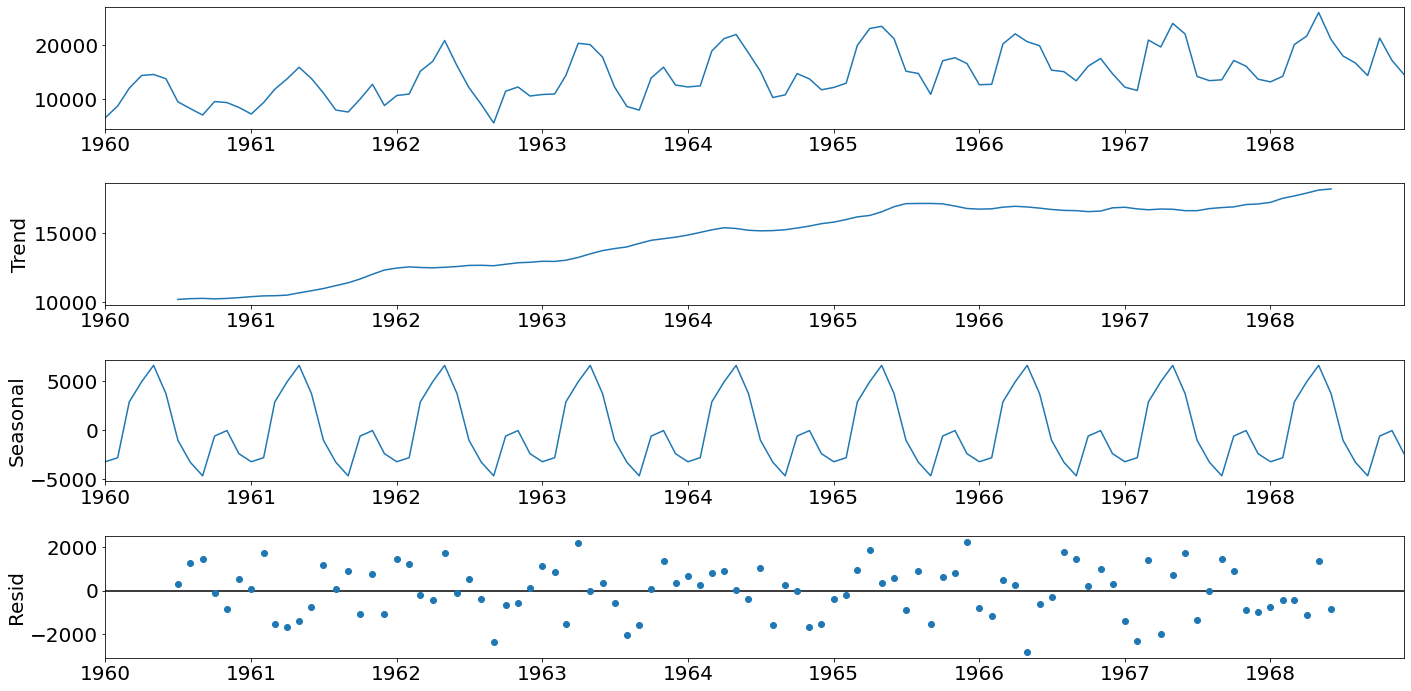

In [79]:
result.plot()
plt.show()